# 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='notebook')


In [2]:
import os
import glob
import re

# 1. Import the data. 

Some two files were deleted due to lack of synchrony. A file that collected measurements on 15th/may/2019 and another on 13th/sept/2019 lacked synchrony and thus were deleted. Out of 94, 92 csv files remained. (we do not loose much data anyway).

In [3]:
#get the data file names
# df = pd.concat(pd.read_csv(glob.glob('C:/Users/Rohi Anon/Desktop/ChaptrGlobal/PRojectXPurpleAir/Data/20*.csv'),engine='python'))))

path = r'C:/Users/Rohi Anon/Desktop/ChaptrGlobal/PRojectXPurpleAir/Data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, engine='python')
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
print(frame)


C:\Users\Rohi Anon\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


                UTCDateTime  adc current_dewpoint_f current_humidity  \
0      2019/09/03T09:53:56z    0              53.96               42   
1      2019/09/03T09:55:16z    0               53.3               41   
2      2019/09/03T09:56:00z    0               53.3               41   
3      2019/09/03T09:57:20z    0               53.3               41   
4      2019/09/03T09:58:40z    0               53.3               41   
...                     ...  ...                ...              ...   
55347  2020/01/06T17:38:30z    0                 61               55   
55348  2020/01/06T17:40:30z    0                 61               54   
55349  2020/01/06T17:42:30z    0                 61               54   
55350  2020/01/06T17:44:32z  NaN                 60               54   
55351  2020/01/06T17:46:32z    0                 61               54   

      current_temp_f firmware_ver  gas  \
0                 79            3  NaN   
1                 79            3  NaN   
2        

In [4]:
len(li)

92

# 2. Data Exploration

In [5]:
frame.head()

,UTCDateTime,adc,current_dewpoint_f,current_humidity,current_temp_f,firmware_ver,gas,hardware,mac_address,mem,...,pm2.5_aqi_atm_b,pm2.5_aqi_cf_1,pm2.5_aqi_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
0,2019/09/03T09:53:56z,0,53.96,42,79,3,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003A+PM...,80:7d:3a:2b:d8:6d,32680,...,94.44,632.93,2,28.36,17.78,28.29,1730.33,852.36,31,30
1,2019/09/03T09:55:16z,0,53.3,41,79,3,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003A+PM...,80:7d:3a:2b:d8:6d,32680,...,183.58,1104.38,15.33,29.44,20.73,28.87,3778.2,852.34,31,110
2,2019/09/03T09:56:00z,0,53.3,41,79,3,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003A+PM...,80:7d:3a:2b:d8:6d,30944,...,121.11,589.53,2.67,26,20.89,26,2539,852.3,31,30
3,2019/09/03T09:57:20z,0,53.3,41,79,3,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003A+PM...,80:7d:3a:2b:d8:6d,30632,...,178.16,1105.67,12.98,30.87,21.58,30.04,4041.07,852.26,31,110
4,2019/09/03T09:58:40z,0,53.3,41,79,3,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003A+PM...,80:7d:3a:2b:d8:6d,30944,...,176.29,1083.62,15.6,30.42,21.2,29.8,3858.4,852.31,31,190


In [6]:
frame.tail()

,UTCDateTime,adc,current_dewpoint_f,current_humidity,current_temp_f,firmware_ver,gas,hardware,mac_address,mem,...,pm2.5_aqi_atm_b,pm2.5_aqi_cf_1,pm2.5_aqi_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
55347,2020/01/06T17:38:30z,0,61,55,79,4.11,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003-B+P...,80:7d:3a:2b:d8:6d,36392,...,267,211,197,241.41,217.09,160.23,144.05,858.06,0,961
55348,2020/01/06T17:40:30z,0,61,54,79,4.11,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003-B+P...,80:7d:3a:2b:d8:6d,36392,...,252,198,191,222.11,201.87,147.41,133.73,858.12,0,1081
55349,2020/01/06T17:42:30z,0,61,54,79,4.11,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003-B+P...,80:7d:3a:2b:d8:6d,36392,...,253,198,192,219.91,202.83,145.86,134.39,858.06,0,1201
55350,2020/01/06T17:44:32z,NaN,60,54,79,4.11,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003-B+P...,80:7d:3a:2b:d8:6d,36656,...,247,198,190,219.94,197.15,145.96,130.81,858.05,0,121
55351,2020/01/06T17:46:32z,0,61,54,79,4.11,NaN,2.0+OPENLOG+15552 MB+DS3231+BME280+PMSX003-B+P...,80:7d:3a:2b:d8:6d,36568,...,256,202,193,228.07,205.91,151.22,136.54,858.04,0,241


In [7]:
frame.columns

Index(['UTCDateTime', 'adc', 'current_dewpoint_f', 'current_humidity',
       'current_temp_f', 'firmware_ver', 'gas', 'hardware', 'mac_address',
       'mem', 'p_0_3_um', 'p_0_3_um_b', 'p_0_5_um', 'p_0_5_um_b', 'p_10_0_um',
       'p_10_0_um_b', 'p_1_0_um', 'p_1_0_um_b', 'p_2_5_um', 'p_2_5_um_b',
       'p_5_0_um', 'p_5_0_um_b', 'pm10_0_atm', 'pm10_0_atm_b', 'pm10_0_cf_1',
       'pm10_0_cf_1_b', 'pm1_0_atm', 'pm1_0_atm_b', 'pm1_0_cf_1',
       'pm1_0_cf_1_b', 'pm2.5_aqi_atm', 'pm2.5_aqi_atm_b', 'pm2.5_aqi_cf_1',
       'pm2.5_aqi_cf_1_b', 'pm2_5_atm', 'pm2_5_atm_b', 'pm2_5_cf_1',
       'pm2_5_cf_1_b', 'pressure', 'rssi', 'uptime'],
      dtype='object')

## 2-1. Making a copy of the dataframe for future engagements.

In [8]:
### Save the frame to excel for easier walkthroughs.
#frame.to_excel(r'C:\Users\Rohi Anon\Desktop\ChaptrGlobal\PRojectXPurpleAir\Scripts\Output\purpleair.xlsx', index=False)
os.getcwd()

## Also save the whole file as an excel workbook.

# writer = pd.ExcelWriter(r'C:\Users\Rohi Anon\Desktop\ChaptrGlobal\PRojectXPurpleAir\Scripts\Output\purpleair_workbook.xlsx', engine='xlsxwriter')
# for f in all_files:
#     df = pd.read_csv(f)
#     df.to_excel(writer,sheet_name=os.path.basename(f))
    
# writer.save()

'C:\\Users\\Rohi Anon\\Desktop\\ChaptrGlobal\\PRojectXPurpleAir\\Scripts'

In [9]:
data = frame.copy()

In [53]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            54391, 54392, 54393, 54394, 54395, 54396, 54397, 54398, 54399,
            54400],
           dtype='int64', length=53450)

## 2-2. Recursive Exploration

In [11]:
def describedata(data):
    print(f'Dimensions = {data.shape}\n')
    try:
        print(f'Columns are: {list(data.columns)}\n')
        print(f'More infomation\n{"-*-"*20}\n')
        f'{data.info()}'
    except AttributeError as Abt:
        print('Info() & df.columns attributes applicable to dataframes only')
    print(f"Data Summary \n{'_-*'*20}\n")
    include =['object', 'float', 'int']
    print(data.describe(include=include))
    print('Bye')
          

describedata(data)

Dimensions = (55352, 41)

Columns are: ['UTCDateTime', 'adc', 'current_dewpoint_f', 'current_humidity', 'current_temp_f', 'firmware_ver', 'gas', 'hardware', 'mac_address', 'mem', 'p_0_3_um', 'p_0_3_um_b', 'p_0_5_um', 'p_0_5_um_b', 'p_10_0_um', 'p_10_0_um_b', 'p_1_0_um', 'p_1_0_um_b', 'p_2_5_um', 'p_2_5_um_b', 'p_5_0_um', 'p_5_0_um_b', 'pm10_0_atm', 'pm10_0_atm_b', 'pm10_0_cf_1', 'pm10_0_cf_1_b', 'pm1_0_atm', 'pm1_0_atm_b', 'pm1_0_cf_1', 'pm1_0_cf_1_b', 'pm2.5_aqi_atm', 'pm2.5_aqi_atm_b', 'pm2.5_aqi_cf_1', 'pm2.5_aqi_cf_1_b', 'pm2_5_atm', 'pm2_5_atm_b', 'pm2_5_cf_1', 'pm2_5_cf_1_b', 'pressure', 'rssi', 'uptime']

More infomation
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55352 entries, 0 to 55351
Data columns (total 41 columns):
UTCDateTime           55343 non-null object
adc                   50191 non-null object
current_dewpoint_f    54418 non-null object
current_humidity      54418 non-null object
current_temp_f   

Let's drop off some columns to remain with data that makes a bit of sence. 
we'll drop:
- adc
- gas
- firmware_ver
- hardware
- mac_address

In [12]:
to_drop = ['adc','gas', 'firmware_ver','mac_address','hardware']
data.drop(columns=to_drop,inplace=True)
data.tail()

,UTCDateTime,current_dewpoint_f,current_humidity,current_temp_f,mem,p_0_3_um,p_0_3_um_b,p_0_5_um,p_0_5_um_b,p_10_0_um,...,pm2.5_aqi_atm_b,pm2.5_aqi_cf_1,pm2.5_aqi_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
55347,2020/01/06T17:38:30z,61,55,79,36392,28844.2,26417.5,8737.33,7705.38,11.74,...,267,211,197,241.41,217.09,160.23,144.05,858.06,0,961
55348,2020/01/06T17:40:30z,61,54,79,36392,26323.1,24678.9,7981.1,7161.06,14.14,...,252,198,191,222.11,201.87,147.41,133.73,858.12,0,1081
55349,2020/01/06T17:42:30z,61,54,79,36392,26156.5,24882.3,7929.82,7262.94,10.18,...,253,198,192,219.91,202.83,145.86,134.39,858.06,0,1201
55350,2020/01/06T17:44:32z,60,54,79,36656,25936.5,24361.8,7879.86,7081.34,10.2,...,247,198,190,219.94,197.15,145.96,130.81,858.05,0,121
55351,2020/01/06T17:46:32z,61,54,79,36568,26606.7,25140,8086.18,7330.68,11.7,...,256,202,193,228.07,205.91,151.22,136.54,858.04,0,241


In [13]:
data.describe()

,UTCDateTime,current_dewpoint_f,current_humidity,current_temp_f,mem,p_0_3_um,p_0_3_um_b,p_0_5_um,p_0_5_um_b,p_10_0_um,...,pm2.5_aqi_atm_b,pm2.5_aqi_cf_1,pm2.5_aqi_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
count,55343,54418,54418.0,54418.0,54418.0,54418.0,54418,54418.0,54418,54418.0,...,44198,44198,44198,54418.0,54418.0,54418.0,54418.0,54418.00,54418,54418.0
unique,54814,749,130.0,104.0,1439.0,43393.0,50993,34628.0,46353,2090.0,...,1037,934,776,11629.0,11744.0,10032.0,10606.0,2287.00,76,1722.0
top,,59,70.0,70.0,36568.0,0.0,0,0.0,0,0.0,...,52,0,52,0.0,0.0,0.0,0.0,851.34,0,121.0
freq,50,7953,1896.0,3197.0,10454.0,1297.0,70,1649.0,179,26838.0,...,844,12543,844,10432.0,169.0,10432.0,169.0,125.00,33304,1683.0


## 2-3. Juggle up with the Nan values... 

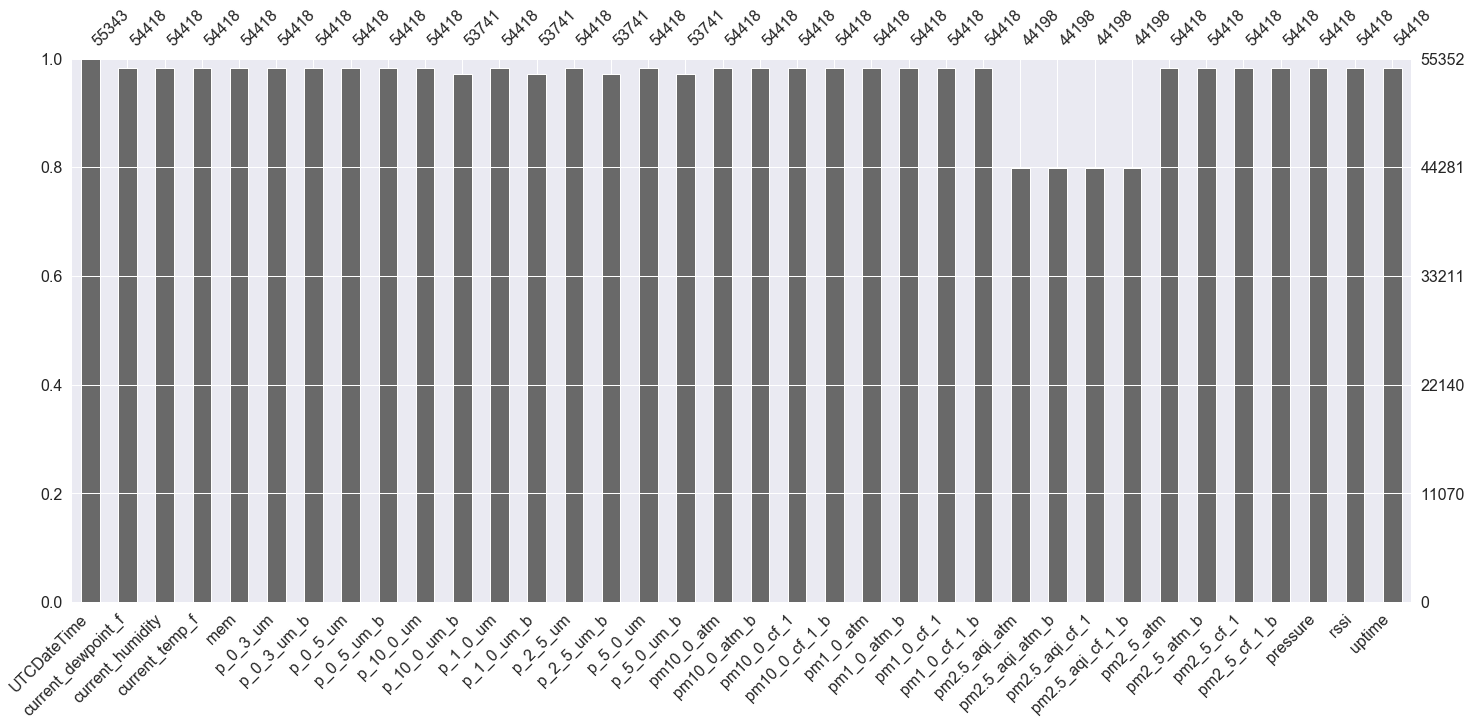

In [14]:
import missingno as msno
msno.bar(data);

The msno package shows that there is atleast a certain threshold of missing values in the dataset. It seems to be more critical from the variables: `pm2_5_aqi_atm` all the way upto `pm_2_5_aqi_cf_1_b`. For the moment, we'll just handle the missing values as np.nans. 

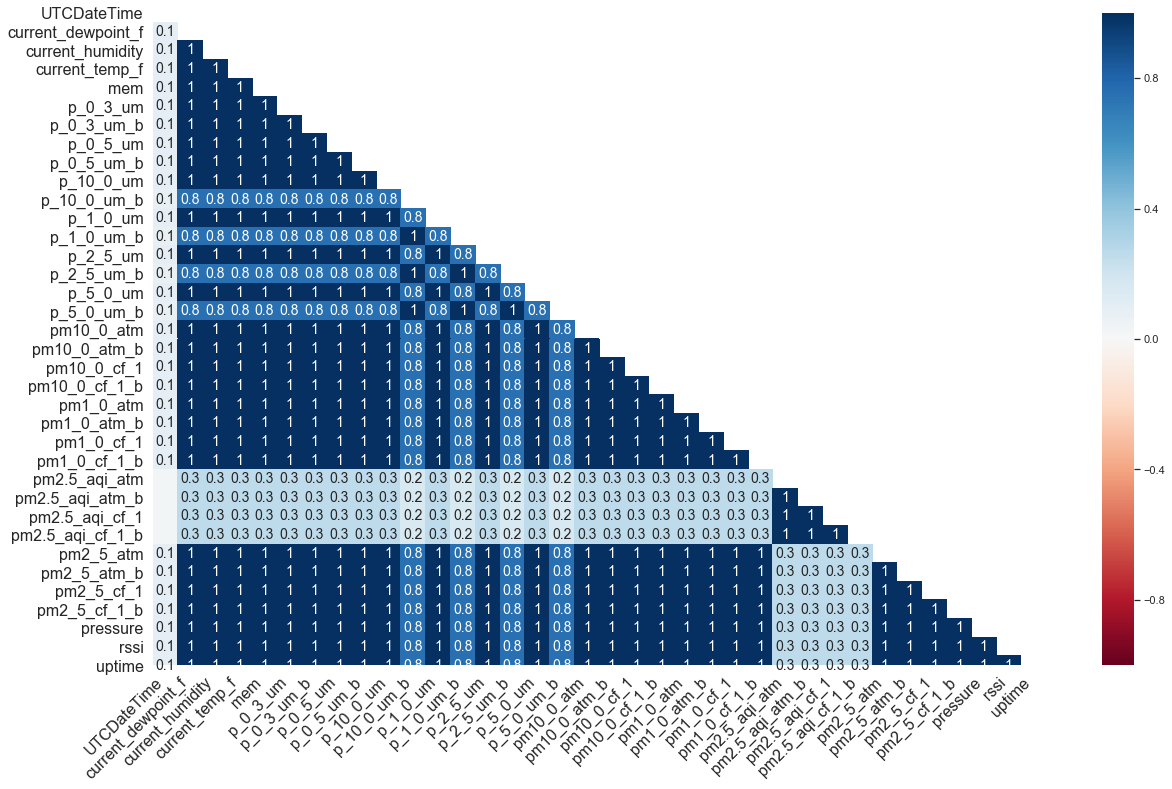

In [15]:
msno.heatmap(data);

The heatmap also shows the lower threshold of the missingness for the given variables. 
Let's handle this.
### Handling Nans and Inconsitent Data

Since the threshold for the variables pm2.5_aqi_atm, pm2.5_aqi_atm_b, pm2.5_aqi_cf_1, and pm2.5_aqi_cf_1_b have literally very low threshold of values, then the best decision is to drop the variables too.

In [16]:
more_to_drop = ['pm2.5_aqi_atm', 'pm2.5_aqi_atm_b', 'pm2.5_aqi_cf_1', 'pm2.5_aqi_cf_1_b']
data.drop(columns=more_to_drop,inplace=True)
data.tail()



,UTCDateTime,current_dewpoint_f,current_humidity,current_temp_f,mem,p_0_3_um,p_0_3_um_b,p_0_5_um,p_0_5_um_b,p_10_0_um,...,pm1_0_atm_b,pm1_0_cf_1,pm1_0_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
55347,2020/01/06T17:38:30z,61,55,79,36392,28844.2,26417.5,8737.33,7705.38,11.74,...,160.24,118.22,106.09,241.41,217.09,160.23,144.05,858.06,0,961
55348,2020/01/06T17:40:30z,61,54,79,36392,26323.1,24678.9,7981.1,7161.06,14.14,...,148.46,108.21,98.12,222.11,201.87,147.41,133.73,858.12,0,1081
55349,2020/01/06T17:42:30z,61,54,79,36392,26156.5,24882.3,7929.82,7262.94,10.18,...,150.81,106.77,99.86,219.91,202.83,145.86,134.39,858.06,0,1201
55350,2020/01/06T17:44:32z,60,54,79,36656,25936.5,24361.8,7879.86,7081.34,10.2,...,147.21,107.4,97.47,219.94,197.15,145.96,130.81,858.05,0,121
55351,2020/01/06T17:46:32z,61,54,79,36568,26606.7,25140,8086.18,7330.68,11.7,...,152.19,109.48,100.72,228.07,205.91,151.22,136.54,858.04,0,241


### Next Hurdle:revamp all the datatypes.

In [17]:
def find_dtype(column):
    return data[column].dtype

In [18]:
for col in data.columns:
    print(f'{col}:~ {find_dtype(col)}')

UTCDateTime:~ object
current_dewpoint_f:~ object
current_humidity:~ object
current_temp_f:~ object
mem:~ object
p_0_3_um:~ object
p_0_3_um_b:~ object
p_0_5_um:~ object
p_0_5_um_b:~ object
p_10_0_um:~ object
p_10_0_um_b:~ object
p_1_0_um:~ object
p_1_0_um_b:~ object
p_2_5_um:~ object
p_2_5_um_b:~ object
p_5_0_um:~ object
p_5_0_um_b:~ object
pm10_0_atm:~ object
pm10_0_atm_b:~ object
pm10_0_cf_1:~ object
pm10_0_cf_1_b:~ object
pm1_0_atm:~ object
pm1_0_atm_b:~ object
pm1_0_cf_1:~ object
pm1_0_cf_1_b:~ object
pm2_5_atm:~ object
pm2_5_atm_b:~ object
pm2_5_cf_1:~ object
pm2_5_cf_1_b:~ object
pressure:~ object
rssi:~ object
uptime:~ object


Looks that I need to alter the datatype ):. 
I.e. UTCDataTime is a data object , current_dewpoint_f is an integer e.t.c

Beginning off with the data object(Date Extraction to be done later during the modelling stage)

In [19]:
pattern = '\x1a\x1a\x1a'
pattern_finder = lambda x: x.lstrip(pattern)
#test pattern_finder function
#pattern_finder('\x1a\x1a\x1a2019/05/16T15:42:32z')
data['UTCDateTime'] = data['UTCDateTime'].astype(str).map(pattern_finder)

In [20]:
#check whether the pattern still exists
data.UTCDateTime[40:100]

40    2019/09/03T10:44:11z
41    2019/09/03T10:45:31z
42    2019/09/03T10:46:51z
43    2019/09/03T10:48:11z
44    2019/09/03T10:49:31z
45    2019/09/03T10:50:51z
46    2019/09/03T10:52:11z
47    2019/09/03T10:53:31z
48    2019/09/03T10:54:51z
49    2019/09/03T10:56:11z
50    2019/09/03T10:57:31z
51    2019/09/03T10:58:51z
52    2019/09/03T10:59:22z
53    2019/09/03T11:00:42z
54    2019/09/03T11:02:02z
55    2019/09/03T11:03:22z
56    2019/09/03T11:04:42z
57    2019/09/03T11:06:02z
58    2019/09/03T11:07:22z
59    2019/09/03T11:08:42z
60    2019/09/03T11:10:02z
61    2019/09/03T11:11:22z
62    2019/09/03T11:11:52z
63    2019/09/03T11:13:12z
64    2019/09/03T11:14:32z
65    2019/09/03T11:15:52z
66    2019/09/03T11:17:12z
67    2019/09/03T11:18:32z
68    2019/09/03T11:19:52z
69    2019/09/03T11:21:12z
70    2019/09/03T11:22:32z
71    2019/09/03T11:23:52z
72    2019/09/03T11:24:22z
73    2019/09/03T11:25:42z
74    2019/09/03T11:27:02z
75    2019/09/03T11:28:22z
76    2019/09/03T11:29:42z
7

In [21]:
print(pattern) #the pattern has been removed




There is also another bug where the date is like 'ets Jan  8 2013'. Only 44 rows depict this pattern and thus we proceed as follows to remove such data pattern.

In [22]:
#remove the bug where format is like, 'ets Jan  8 2013'
mask = data['UTCDateTime'] != ' ets Jan  8 2013'
new_data = data[mask]


The date column is still yet dirty... Let's keep on removing the dirt, i.e. 'load 0x4010f000'

In [23]:
mask1 = data['UTCDateTime'] != 'load 0x4010f000'
new_data1 = new_data[mask1]

C:\Users\Rohi Anon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


More yet to be done...

In [24]:
new_data = new_data1[(new_data1.UTCDateTime.astype(str).str.startswith('2019')) | (new_data1.UTCDateTime.astype(str).str.startswith('2020'))]
new_data

,UTCDateTime,current_dewpoint_f,current_humidity,current_temp_f,mem,p_0_3_um,p_0_3_um_b,p_0_5_um,p_0_5_um_b,p_10_0_um,...,pm1_0_atm_b,pm1_0_cf_1,pm1_0_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
0,2019/09/03T09:53:56z,53.96,42,79,32680,107.29,0.44,8.57,0.44,22.89,...,23.78,20.07,23.78,28.36,17.78,28.29,1730.33,852.36,31,30
1,2019/09/03T09:55:16z,53.3,41,79,32680,180.51,2.89,12.67,0.71,31.09,...,33.69,20.16,33.69,29.44,20.73,28.87,3778.2,852.34,31,110
2,2019/09/03T09:56:00z,53.3,41,79,30944,110.6,0.44,7.07,0,28.89,...,30.11,18.93,30.11,26,20.89,26,2539,852.3,31,30
3,2019/09/03T09:57:20z,53.3,41,79,30632,198.58,4.53,11.07,0.22,30.93,...,34.76,19.89,34.76,30.87,21.58,30.04,4041.07,852.26,31,110
4,2019/09/03T09:58:40z,53.3,41,79,30944,188.36,5.42,15.2,1.33,30.04,...,35.4,19.8,35.4,30.42,21.2,29.8,3858.4,852.31,31,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55347,2020/01/06T17:38:30z,61,55,79,36392,28844.2,26417.5,8737.33,7705.38,11.74,...,160.24,118.22,106.09,241.41,217.09,160.23,144.05,858.06,0,961
55348,2020/01/06T17:40:30z,61,54,79,36392,26323.1,24678.9,7981.1,7161.06,14.14,...,148.46,108.21,98.12,222.11,201.87,147.41,133.73,858.12,0,1081
55349,2020/01/06T17:42:30z,61,54,79,36392,26156.5,24882.3,7929.82,7262.94,10.18,...,150.81,106.77,99.86,219.91,202.83,145.86,134.39,858.06,0,1201
55350,2020/01/06T17:44:32z,60,54,79,36656,25936.5,24361.8,7879.86,7081.34,10.2,...,147.21,107.4,97.47,219.94,197.15,145.96,130.81,858.05,0,121


### At one go, I was able to filter all the invalid dates collected by purple air.
Let's convert the date column to pandas datatime obect.

In [25]:
new_data['UTCDateTime'] = pd.to_datetime(new_data['UTCDateTime']) #,format='%Y%m%d%TH%M%S'
new_data.head()

C:\Users\Rohi Anon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UTCDateTime,current_dewpoint_f,current_humidity,current_temp_f,mem,p_0_3_um,p_0_3_um_b,p_0_5_um,p_0_5_um_b,p_10_0_um,...,pm1_0_atm_b,pm1_0_cf_1,pm1_0_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
0,2019-09-03 09:53:56+00:00,53.96,42,79,32680,107.29,0.44,8.57,0.44,22.89,...,23.78,20.07,23.78,28.36,17.78,28.29,1730.33,852.36,31,30
1,2019-09-03 09:55:16+00:00,53.3,41,79,32680,180.51,2.89,12.67,0.71,31.09,...,33.69,20.16,33.69,29.44,20.73,28.87,3778.2,852.34,31,110
2,2019-09-03 09:56:00+00:00,53.3,41,79,30944,110.6,0.44,7.07,0,28.89,...,30.11,18.93,30.11,26,20.89,26,2539,852.3,31,30
3,2019-09-03 09:57:20+00:00,53.3,41,79,30632,198.58,4.53,11.07,0.22,30.93,...,34.76,19.89,34.76,30.87,21.58,30.04,4041.07,852.26,31,110
4,2019-09-03 09:58:40+00:00,53.3,41,79,30944,188.36,5.42,15.2,1.33,30.04,...,35.4,19.8,35.4,30.42,21.2,29.8,3858.4,852.31,31,190


In [26]:
new_data.UTCDateTime.astype(str).str.match(r'\d+').count()

54401

Reindex the data now that we've got a cool start.

In [27]:
data = new_data.reindex(index=range(0,len(new_data)))
data

,UTCDateTime,current_dewpoint_f,current_humidity,current_temp_f,mem,p_0_3_um,p_0_3_um_b,p_0_5_um,p_0_5_um_b,p_10_0_um,...,pm1_0_atm_b,pm1_0_cf_1,pm1_0_cf_1_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b,pressure,rssi,uptime
0,2019-09-03 09:53:56+00:00,53.96,42,79,32680,107.29,0.44,8.57,0.44,22.89,...,23.78,20.07,23.78,28.36,17.78,28.29,1730.33,852.36,31,30
1,2019-09-03 09:55:16+00:00,53.3,41,79,32680,180.51,2.89,12.67,0.71,31.09,...,33.69,20.16,33.69,29.44,20.73,28.87,3778.2,852.34,31,110
2,2019-09-03 09:56:00+00:00,53.3,41,79,30944,110.6,0.44,7.07,0,28.89,...,30.11,18.93,30.11,26,20.89,26,2539,852.3,31,30
3,2019-09-03 09:57:20+00:00,53.3,41,79,30632,198.58,4.53,11.07,0.22,30.93,...,34.76,19.89,34.76,30.87,21.58,30.04,4041.07,852.26,31,110
4,2019-09-03 09:58:40+00:00,53.3,41,79,30944,188.36,5.42,15.2,1.33,30.04,...,35.4,19.8,35.4,30.42,21.2,29.8,3858.4,852.31,31,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54396,2020-01-05 09:52:27+00:00,50,21,95,36392,1624.98,1440.24,482.14,410.11,1.23,...,7.24,8.75,7.24,10.82,9.9,10.82,9.9,856.52,0,1082
54397,2020-01-05 09:54:27+00:00,48,21,94,36392,1423.62,1451.36,411.69,413.33,0.58,...,7.55,7.48,7.55,9.06,10.02,9.06,10.02,856.49,0,1202
54398,2020-01-05 09:56:29+00:00,50,22,95,36656,1568.16,1401.41,460.62,390.84,1.44,...,6.89,8.28,6.89,10.96,9.73,10.96,9.73,856.42,0,122
54399,2020-01-05 09:58:29+00:00,49,21,95,36432,1485.18,1383.09,440.92,399.94,0.77,...,7.01,7.82,7.01,10,9.16,10,9.16,856.37,0,242


In [28]:
(new_data.UTCDateTime.astype(str).str.startswith('20')).count()

54401

#### Check the data type again. 


In [29]:
for i,col in enumerate(data.columns):
    print(f'{i} :<--> {col} :<--> {find_dtype(col)}')

0 :<--> UTCDateTime :<--> datetime64[ns, UTC]
1 :<--> current_dewpoint_f :<--> object
2 :<--> current_humidity :<--> object
3 :<--> current_temp_f :<--> object
4 :<--> mem :<--> object
5 :<--> p_0_3_um :<--> object
6 :<--> p_0_3_um_b :<--> object
7 :<--> p_0_5_um :<--> object
8 :<--> p_0_5_um_b :<--> object
9 :<--> p_10_0_um :<--> object
10 :<--> p_10_0_um_b :<--> object
11 :<--> p_1_0_um :<--> object
12 :<--> p_1_0_um_b :<--> object
13 :<--> p_2_5_um :<--> object
14 :<--> p_2_5_um_b :<--> object
15 :<--> p_5_0_um :<--> object
16 :<--> p_5_0_um_b :<--> object
17 :<--> pm10_0_atm :<--> object
18 :<--> pm10_0_atm_b :<--> object
19 :<--> pm10_0_cf_1 :<--> object
20 :<--> pm10_0_cf_1_b :<--> object
21 :<--> pm1_0_atm :<--> object
22 :<--> pm1_0_atm_b :<--> object
23 :<--> pm1_0_cf_1 :<--> object
24 :<--> pm1_0_cf_1_b :<--> object
25 :<--> pm2_5_atm :<--> object
26 :<--> pm2_5_atm_b :<--> object
27 :<--> pm2_5_cf_1 :<--> object
28 :<--> pm2_5_cf_1_b :<--> object
29 :<--> pressure :<--> obje

#### Still yet a long way to alter the datatypes.


In [30]:
data.columns

Index(['UTCDateTime', 'current_dewpoint_f', 'current_humidity',
       'current_temp_f', 'mem', 'p_0_3_um', 'p_0_3_um_b', 'p_0_5_um',
       'p_0_5_um_b', 'p_10_0_um', 'p_10_0_um_b', 'p_1_0_um', 'p_1_0_um_b',
       'p_2_5_um', 'p_2_5_um_b', 'p_5_0_um', 'p_5_0_um_b', 'pm10_0_atm',
       'pm10_0_atm_b', 'pm10_0_cf_1', 'pm10_0_cf_1_b', 'pm1_0_atm',
       'pm1_0_atm_b', 'pm1_0_cf_1', 'pm1_0_cf_1_b', 'pm2_5_atm', 'pm2_5_atm_b',
       'pm2_5_cf_1', 'pm2_5_cf_1_b', 'pressure', 'rssi', 'uptime'],
      dtype='object')

In [31]:
#list of different features.
int_feature_list = ['current_temp_f','mem','rssi','uptime']
float_feature_list = ['current_dewpoint_f','p_0_3_um','p_0_3_um_b','p_0_5_um','p_0_5_um_b','p_10_0_um','p_10_0_um_b','p_1_0_um','p_1_0_um_b',\
                      'p_2_5_um','p_2_5_um_b','p_5_0_um','p_5_0_um_b','pm10_0_atm','pm10_0_atm', 'pm10_0_atm_b',\
                      'pm10_0_cf_1','pm10_0_cf_1_b','pm1_0_atm','pm1_0_atm_b','pm1_0_cf_1', 'pm1_0_cf_1_b',\
                       'pm2_5_atm','pm2_5_atm_b', 'pm2_5_cf_1', 'pm2_5_cf_1_b', 'pressure']

#int_conversion
for feature in int_feature_list:
    data[feature] = data[feature].astype('Float64').astype('Int64')

        
#float conversion
for feature in float_feature_list:
    data[feature] = data[feature].astype(float)
        

for i,col in enumerate(data.columns):
    print(f'{i} :<--> {col} :<--> {find_dtype(col)}')


    
    

0 :<--> UTCDateTime :<--> datetime64[ns, UTC]
1 :<--> current_dewpoint_f :<--> float64
2 :<--> current_humidity :<--> object
3 :<--> current_temp_f :<--> Int64
4 :<--> mem :<--> Int64
5 :<--> p_0_3_um :<--> float64
6 :<--> p_0_3_um_b :<--> float64
7 :<--> p_0_5_um :<--> float64
8 :<--> p_0_5_um_b :<--> float64
9 :<--> p_10_0_um :<--> float64
10 :<--> p_10_0_um_b :<--> float64
11 :<--> p_1_0_um :<--> float64
12 :<--> p_1_0_um_b :<--> float64
13 :<--> p_2_5_um :<--> float64
14 :<--> p_2_5_um_b :<--> float64
15 :<--> p_5_0_um :<--> float64
16 :<--> p_5_0_um_b :<--> float64
17 :<--> pm10_0_atm :<--> float64
18 :<--> pm10_0_atm_b :<--> float64
19 :<--> pm10_0_cf_1 :<--> float64
20 :<--> pm10_0_cf_1_b :<--> float64
21 :<--> pm1_0_atm :<--> float64
22 :<--> pm1_0_atm_b :<--> float64
23 :<--> pm1_0_cf_1 :<--> float64
24 :<--> pm1_0_cf_1_b :<--> float64
25 :<--> pm2_5_atm :<--> float64
26 :<--> pm2_5_atm_b :<--> float64
27 :<--> pm2_5_cf_1 :<--> float64
28 :<--> pm2_5_cf_1_b :<--> float64
29 :<

### Now coniserder type conversion a done deal. Let's get to the next hurdle:::: Missing Values

In [40]:
#check for NaNs and print them. 
nulls = []
def nan_checker(data, column,threshold = len(data)/1000):
    #formated string
    Bold = '\033[1m'
    End = '\033[0m'
    null_counter = data[column].isnull().sum()
    if data[column].isnull().values.any():
        print(f'For {column} \n You need to handle  { Bold} {null_counter} {End} Missing values now')
        return nulls.append(column)
    return ''

for col in data.columns:
    nan_checker(data, col)

For p_10_0_um_b 
 You need to handle   676  Missing values now
For p_1_0_um_b 
 You need to handle   676  Missing values now
For p_2_5_um_b 
 You need to handle   676  Missing values now
For p_5_0_um_b 
 You need to handle   676  Missing values now


### most of the data columns have 951 missing values, what could be the problem?
lets visualize this and get the bottom of this.

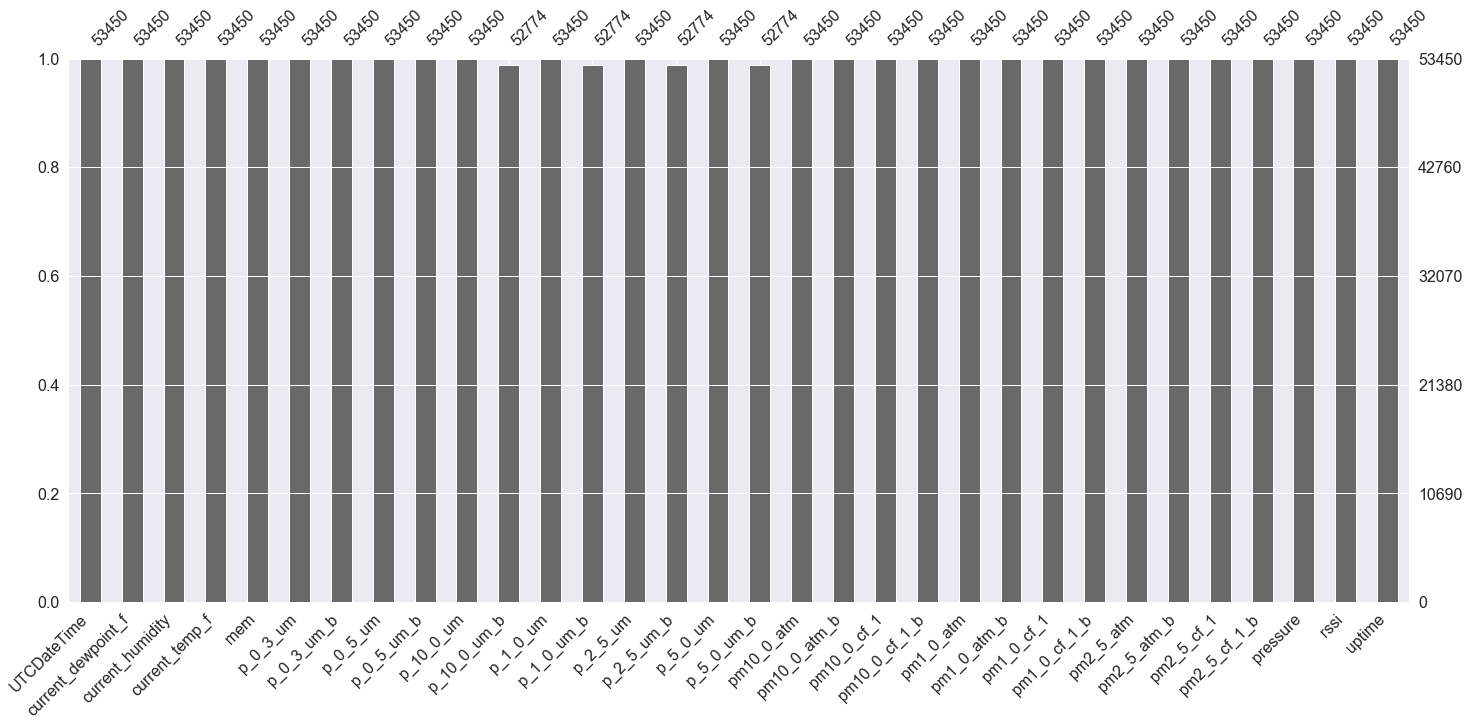

In [41]:
msno.bar(data);

In [42]:
null_data = data[data.isnull().all(axis=1)]
len(null_data)

0

### Huh!... Sure the 951 null values can be dropped off as they are in both columns and rows. This simplifies our problem now.

In [43]:
data = data[~data.isnull().all(axis=1)]
len(data)

53450

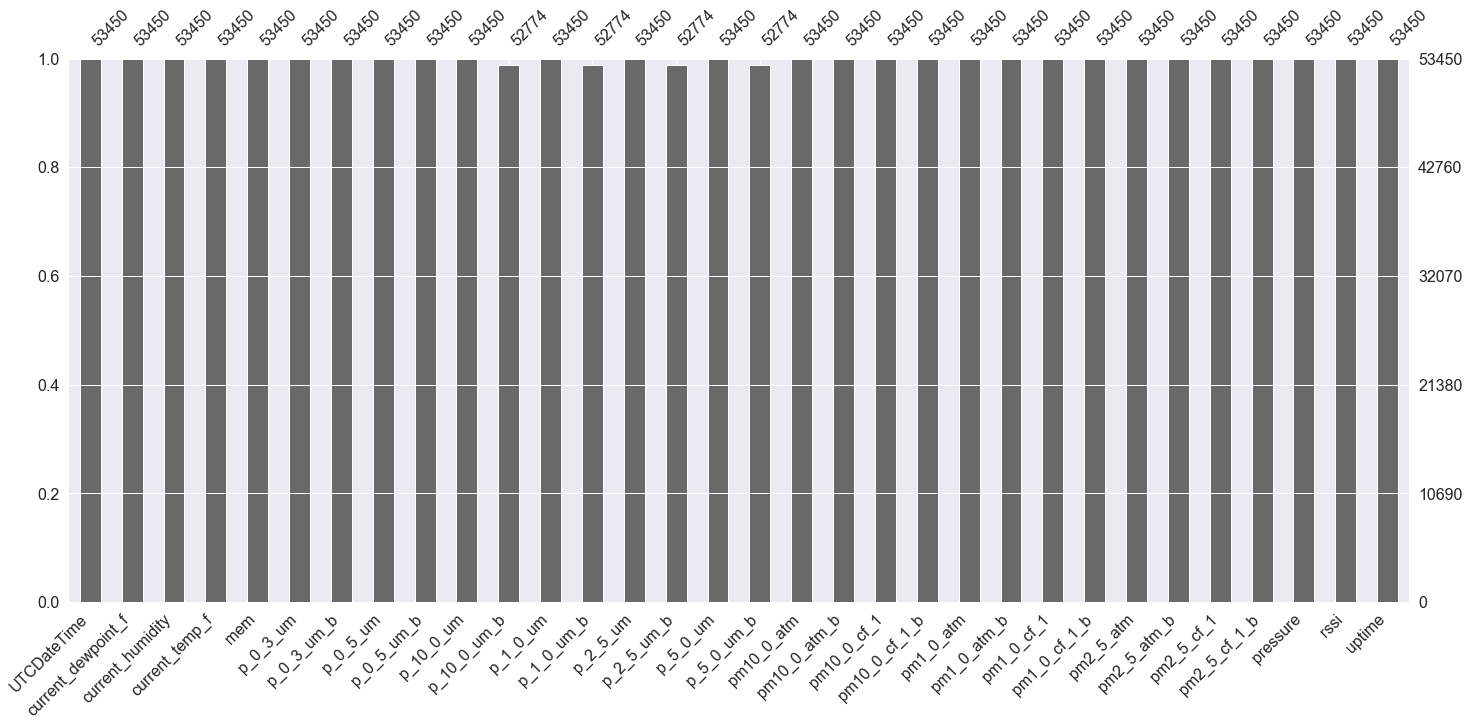

In [37]:
msno.bar(data);

In [44]:
for col in data.columns:
    nan_checker(data, col)

For p_10_0_um_b 
 You need to handle   676  Missing values now
For p_1_0_um_b 
 You need to handle   676  Missing values now
For p_2_5_um_b 
 You need to handle   676  Missing values now
For p_5_0_um_b 
 You need to handle   676  Missing values now


### Maybe it's time we also have to examine the 676 missing values too. 
nulls contains the columns with these missing values. Let's investigate.

In [45]:
nulls

['p_10_0_um_b',
 'p_1_0_um_b',
 'p_2_5_um_b',
 'p_5_0_um_b',
 'p_10_0_um_b',
 'p_1_0_um_b',
 'p_2_5_um_b',
 'p_5_0_um_b']

In [55]:
pd.set_option('display.max_rows', len(data))
data = data[~data.loc[:,nulls].isnull().all(axis=1)]
len(data)


52774

Droping Null values is likely to give us a better prediction as compared to using other filling methods. This is because we're specifically dealing with a time series data. 

In [60]:
for col in data.columns:
    if len(nulls)>0:
        nan_checker(data, col)
    else:
        print('No null values')

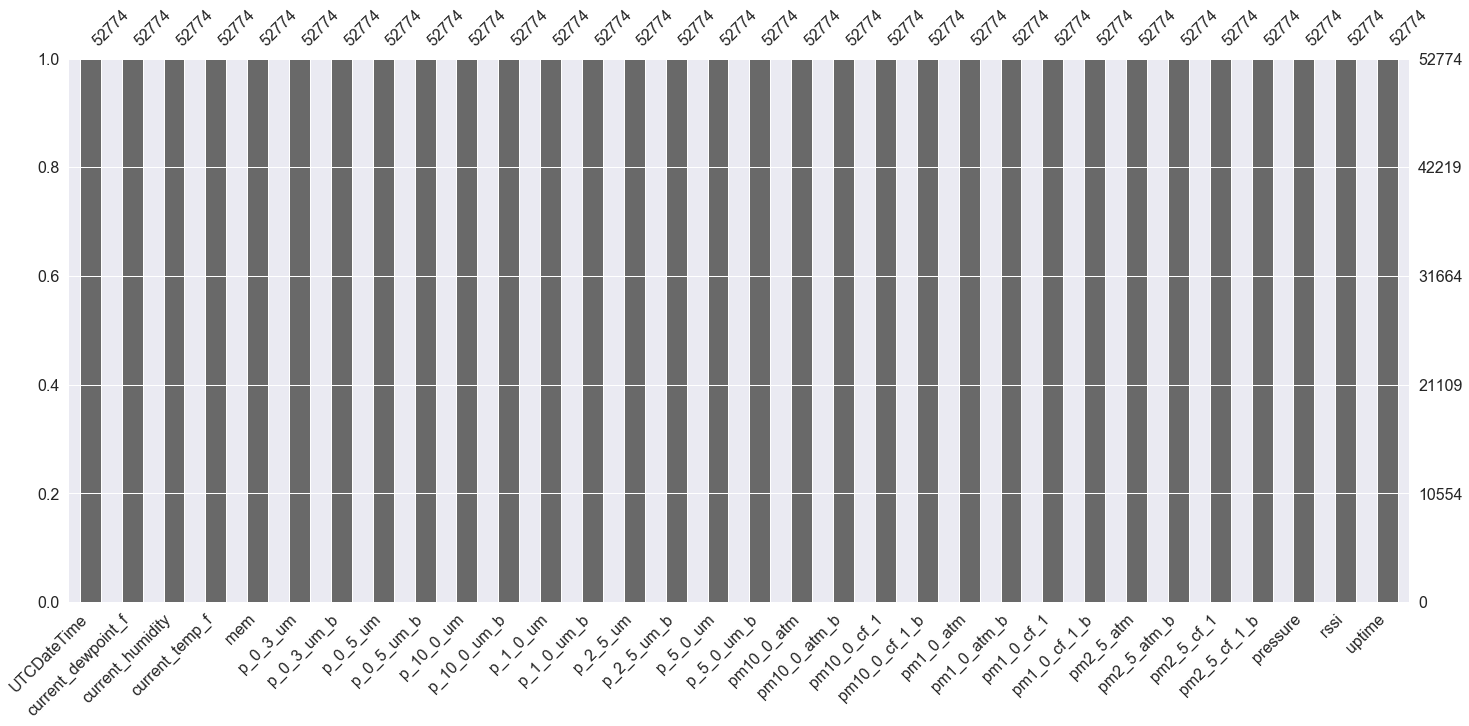

In [62]:
msno.bar(data);

Atlast, we have no anymore missing values to handle. Let's keep on the pace.

## More Data Exploration and Cleaning using Visualizations. 

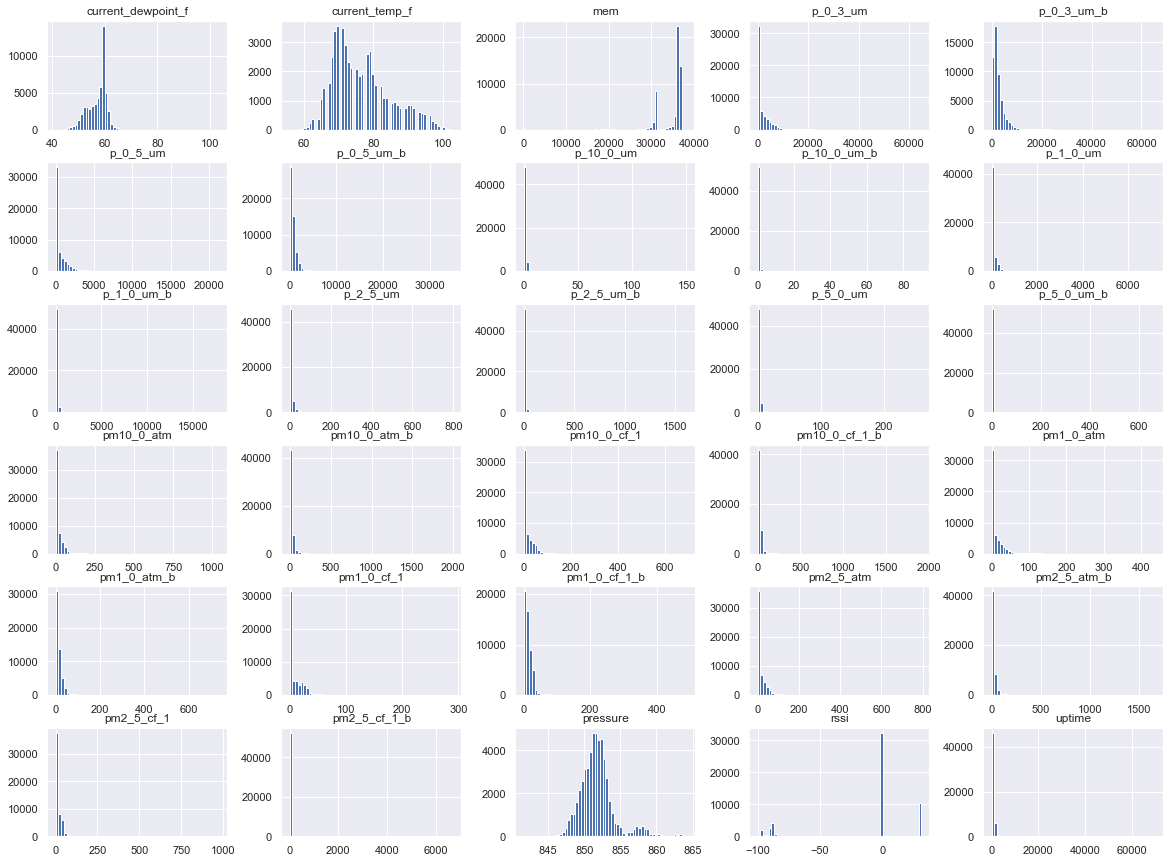

In [50]:
data.hist(figsize=(20,15), bins=60);

Interest focuses on some weather features and PM 2.5. Implying the remaining PM values are really not necessary unless we wanna carry out a comperative study. 

In [79]:
pm2_5_features = list(data.columns[data.columns.str.startswith('p_2_5') | data.columns.str.startswith('pm2_5') ])
pm2_5_features

weather_features = ['current_dewpoint_f', 'current_humidity',
       'current_temp_f','pressure']
weather_features

miscelleneous = ['UTCDateTime','uptime']
miscelleneous

['UTCDateTime', 'uptime']

In [100]:
df = data.loc[:, miscelleneous].merge(data.loc[:,weather_features],right_index=True,left_index=True).\
    merge(data.loc[:,pm2_5_features],right_index=True,left_index=True)
df = df.reset_index().drop('index',axis=1)
df.head()


,UTCDateTime,uptime,current_dewpoint_f,current_humidity,current_temp_f,pressure,p_2_5_um,p_2_5_um_b,pm2_5_atm,pm2_5_atm_b,pm2_5_cf_1,pm2_5_cf_1_b
0,2019-09-04 00:00:14+00:00,350,52.42,66,64,851.01,8.59,7.20,27.57,12.47,27.57,12.47
1,2019-09-04 00:01:34+00:00,430,52.42,66,64,851.02,6.62,4.43,20.74,15.30,20.74,15.30
2,2019-09-04 00:02:54+00:00,510,52.42,66,64,851.05,8.00,6.59,15.44,17.18,15.44,17.18
3,2019-09-04 00:04:14+00:00,590,52.42,66,64,851.02,7.78,13.83,17.46,17.87,17.46,17.87
4,2019-09-04 00:05:34+00:00,670,52.42,66,64,851.09,5.65,10.44,14.72,15.36,14.72,15.36


#### A very clean datset to use now. 

In [ ]:
df

# Feature Engineering 

###  Converting field values from mg to $\mu$g 

$$1 mg = 1,000 \mu g$$

### Conveting temperature 